In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('AirPassengers.csv')

NOTE: Most of the content is from https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
<h3>Time Series Decomposition</h3>
<p>Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.</p>
<p>Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.</p>

<h4>Time Series Components</h4>
<p>A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.</p>

<p> <b>Systematic</b>: Components of the time series that have consistency or recurrence and can be described and modeled.</p>
<p> <b>Non-Systematic</b>: Components of the time series that cannot be directly modeled.</p>

<p>A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.</p>

These components are defined as follows:
<ul>
    <li>Level: The average value in the series.</li>
    <li>Trend: The increasing or decreasing value in the series.</li>
    <li>Seasonality: The repeating short-term cycle in the series.</li>
    <li>Noise: The random variation in the series.</li>
</ul>

<h4>Combining Time Series Components</h4>
<p>A series is thought to be an aggregate or combination of these four components.</p>

<p>All series have a level and noise. The trend and seasonality components are optional.</p>

<p>It is helpful to think of the components as combining either additively or multiplicatively.</p>

<h4>Additive Model</h4>
<p>An additive model suggests that the components are added together as follows:</p>
<i>y(t) = Level + Trend + Seasonality + Noise </i>

<p>An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).</p>

<h4>Multiplicative Model</h4>
<p>
A multiplicative model suggests that the components are multiplied together as follows:<br />
<i> y(t) = Level * Trend * Seasonality * Noise </i>

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.
</p>

<p>
    <h4>Decomposition as a Tool</h4>
This is a useful abstraction.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.
</p>

<p>
    <h4>Automatic Time Series Decomposition</h4>
There are methods to automatically decompose a time series.

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.
</p>

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
series = np.linspace(-10, 10, 100) + np.random.randn(100) * 10

In [5]:
result = seasonal_decompose(series, model='additive', period=1)

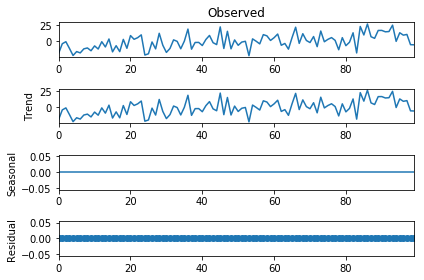

In [9]:
result.plot();

In [12]:
# We can also look at the specific component 
result.trend

array([-1.79619806e+01, -3.68364319e+00, -6.32337547e-01, -1.07925436e+01,
       -2.14152114e+01, -1.55364953e+01, -1.75231009e+01, -1.14279996e+01,
       -1.00471343e+01, -1.42740210e+01, -6.96428409e+00, -1.16610884e+01,
       -6.32279154e-01, -8.57200293e+00,  3.47606508e+00, -1.59363893e+01,
       -6.64941754e+00, -1.56163874e+01,  2.88074769e+00, -1.05778873e+01,
        8.64699418e+00,  3.01477468e+00,  5.45371220e+00,  9.71742976e+00,
       -2.07321296e+01, -1.88720774e+01, -1.01553647e+00, -1.14544827e+01,
        1.20840138e+01, -5.95342241e+00, -1.67866195e+01, -1.07825814e+01,
        2.16252638e+00, -1.01119415e-01, -1.12997131e+01,  2.70555095e-01,
        1.84190884e+01, -1.19045247e+01, -1.76566567e+00, -1.68689113e+00,
       -6.40327803e+00,  2.73479125e+00,  8.83110903e+00, -2.09027497e+00,
       -4.95792431e+00,  2.17120965e+01, -1.08510688e+01,  1.50751495e+01,
       -1.13708086e+01,  2.04697603e+00, -6.03204423e+00, -1.18399824e+00,
        4.43671355e-04, -

In [13]:
result.seasonal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
# You can plot each series seperately using matplotlib, or you can add these results into dataframe and explore them more!!

<p>
We can see that the entire series was taken as the trend component and that there was no seasonality.
We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

The naive decomposition method is a simple one, and there are more advanced decompositions available, like Seasonal and Trend decomposition using Loess or STL decomposition.
</p>